In [1]:
import pandas as pd
import os
import straw
import numpy as np
import glob
from pybedtools import BedTool

In [2]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

## loops overlap

In [109]:
PATH_WT_16_Loops = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/WT_CD8_2016.bedpe"
#PATH_DKO_16_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/DKO_2016.bedpe"
PATH_WT_19_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive/diff_hiccup/WT_CD8_2019_loops_fdr_0.00001.bedpe"

df_WT_16_Loops = pd.read_csv(PATH_WT_16_Loops,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2']).drop(axis=0, index=0)
df_WT_19_Loops = pd.read_csv(PATH_WT_19_Loops,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2']).drop(axis=0, index=0)
df_WT_19_Loops['#chr1'] = 'chr'+df_WT_19_Loops.iloc[:,[0]].astype(str)
df_WT_19_Loops['x1'] = df_WT_19_Loops.iloc[:,[1]].astype(int)
df_WT_19_Loops['x2'] = df_WT_19_Loops.iloc[:,[2]].astype(int)
df_WT_19_Loops['y1'] = df_WT_19_Loops.iloc[:,[4]].astype(int)
df_WT_19_Loops['y2'] = df_WT_19_Loops.iloc[:,[5]].astype(int)


df_WT_16_Loops['#chr1'] = 'chr'+df_WT_16_Loops.iloc[:,[0]].astype(str)
df_WT_16_Loops['x1'] = df_WT_16_Loops.iloc[:,[1]].astype(int)
df_WT_16_Loops['x2'] = df_WT_16_Loops.iloc[:,[2]].astype(int)
df_WT_16_Loops['y1'] = df_WT_16_Loops.iloc[:,[4]].astype(int)
df_WT_16_Loops['y2'] = df_WT_16_Loops.iloc[:,[5]].astype(int)




df_loops_1 = df_WT_16_Loops.reset_index()
df_loops_2 = df_WT_19_Loops.reset_index()

Bed_loops1_left = BedTool.from_dataframe(df_loops_1.iloc[:,[1,2,3,0]]).sort()
Bed_loops2_left = BedTool.from_dataframe(df_loops_2.iloc[:,[1,2,3,0]]).sort()

Bed_loops1_right = BedTool.from_dataframe(df_loops_1.iloc[:,[1,5,6,0]]).sort()
Bed_loops2_right = BedTool.from_dataframe(df_loops_2.iloc[:,[1,5,6,0]]).sort()

Bed_overlap_left = Bed_loops1_left.intersect(Bed_loops2_left, wb=True)
Bed_overlap_right = Bed_loops1_right.intersect(Bed_loops2_right, wb=True)

df_Bed_overlap_left = pd.read_csv( Bed_overlap_left.fn, sep="\t", header=None)
df_Bed_overlap_right = pd.read_csv( Bed_overlap_right.fn, sep="\t", header=None)
df_merge= df_Bed_overlap_left.merge(df_Bed_overlap_right, on=[3,7], how='inner', suffixes=('_left','_right'))
df_merge.shape


(3927, 14)

In [124]:
pd.read_csv(PATH_WT_16_Loops,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2','fdrDonut']).drop(axis=0, index=0).head(1)

,#chr1,x1,x2,chr2,y1,y2,fdrDonut
1,10,39970000.0,39980000.0,10,40060000.0,40070000.0,4.883472e-11


In [125]:
def overlap_between_two_loops(path_loop1, path_loop2, fdr_donut):
    df_WT_16_Loops = pd.read_csv(path_loop1,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2','fdrDonut']).drop(axis=0, index=0)
    df_WT_19_Loops = pd.read_csv(path_loop2,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2','fdrDonut']).drop(axis=0, index=0)
    ## Filter
    df_WT_16_Loops = df_WT_16_Loops[df_WT_16_Loops['fdrDonut']<fdr_donut]
    df_WT_19_Loops = df_WT_19_Loops[df_WT_19_Loops['fdrDonut']<fdr_donut]
    ##
    
    Num_Loop1 = len(df_WT_16_Loops)
    print ("# of Loop 1:" + str(Num_Loop1))
    Num_Loop2 = len(df_WT_19_Loops)
    print ("# of Loop 2:" + str(Num_Loop2))
    ## Data preparation.
    df_WT_19_Loops['#chr1'] = 'chr'+df_WT_19_Loops.iloc[:,[0]].astype(str)
    df_WT_19_Loops['x1'] = df_WT_19_Loops.iloc[:,[1]].astype(int)
    df_WT_19_Loops['x2'] = df_WT_19_Loops.iloc[:,[2]].astype(int)
    df_WT_19_Loops['y1'] = df_WT_19_Loops.iloc[:,[4]].astype(int)
    df_WT_19_Loops['y2'] = df_WT_19_Loops.iloc[:,[5]].astype(int)

    df_WT_16_Loops['#chr1'] = 'chr'+df_WT_16_Loops.iloc[:,[0]].astype(str)
    df_WT_16_Loops['x1'] = df_WT_16_Loops.iloc[:,[1]].astype(int)
    df_WT_16_Loops['x2'] = df_WT_16_Loops.iloc[:,[2]].astype(int)
    df_WT_16_Loops['y1'] = df_WT_16_Loops.iloc[:,[4]].astype(int)
    df_WT_16_Loops['y2'] = df_WT_16_Loops.iloc[:,[5]].astype(int)

    df_loops_1 = df_WT_16_Loops.reset_index()
    df_loops_2 = df_WT_19_Loops.reset_index()

    Bed_loops1_left = BedTool.from_dataframe(df_loops_1.iloc[:,[1,2,3,0]]).sort()
    Bed_loops2_left = BedTool.from_dataframe(df_loops_2.iloc[:,[1,2,3,0]]).sort()

    Bed_loops1_right = BedTool.from_dataframe(df_loops_1.iloc[:,[1,5,6,0]]).sort()
    Bed_loops2_right = BedTool.from_dataframe(df_loops_2.iloc[:,[1,5,6,0]]).sort()

    Bed_overlap_left = Bed_loops1_left.intersect(Bed_loops2_left, wb=True)
    Bed_overlap_right = Bed_loops1_right.intersect(Bed_loops2_right, wb=True)

    df_Bed_overlap_left = pd.read_csv( Bed_overlap_left.fn, sep="\t", header=None)
    df_Bed_overlap_right = pd.read_csv( Bed_overlap_right.fn, sep="\t", header=None)
    df_merge= df_Bed_overlap_left.merge(df_Bed_overlap_right, on=[3,7], how='inner', suffixes=('_left','_right'))
    Num_Loops_overlap=len(df_merge)
    print ("Overlap Loops: " + str(Num_Loops_overlap))
    
    
    from matplotlib_venn import venn2
    out = venn2(subsets=(Num_Loop1-Num_Loops_overlap, Num_Loop2-Num_Loops_overlap, Num_Loops_overlap),
          set_labels=("Loops_1: "+str(Num_Loop1),"Loops_2: "+ str(Num_Loop2)))
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    return None



/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# of Loop 1:3204
# of Loop 2:5199
Overlap Loops: 1579


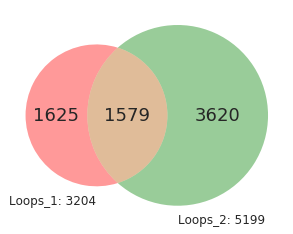

In [136]:
# 10K
PATH_WT_16_Loops = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/WT_CD8_2016.bedpe"
PATH_DKO_16_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/DKO_2016.bedpe"
PATH_WT_19_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive/diff_hiccup/WT_CD8_2019_loops.bedpe"


# 100K
#PATH_WT_16_Loops = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/WT_CD8_16_100ks.bedpe"
#PATH_DKO_16_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/DKO_CD8_16_100k.bedpe"
#PATH_WT_19_Loops ="/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res100k/2019/WT_CD8/WT_CD8_19_100K_merged_loops_FDR_10-5.bedpe"

fdr_D_value = 0.0000000001

overlap_between_two_loops(PATH_WT_16_Loops, PATH_WT_19_Loops, fdr_D_value)

In [71]:
## overlap baseline
df_WT_19_Loops.merge(df_WT_16_Loops).shape

(3439, 6)

# End of Loop Overlap

In [107]:
def given_loops_and_hic_return_observed_PETs(path_loops, path_hic, resolution, label1, label2):
    df_loops = pd.read_csv(path_loops,sep='\t', usecols=['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2','observed','fdrDonut']).drop(axis=0, index=0)
    
    list_observed=[]
    
    for i in range(len(df_loops)):
        bin_1 = df_loops.iloc[i]['#chr1']+':'+str(int(df_loops.iloc[i]['x1']))+':'+str(int(df_loops.iloc[i]['x2']))
        bin_2 = df_loops.iloc[i]['chr2']+':'+str(int(df_loops.iloc[i]['y1']))+':'+str(int(df_loops.iloc[i]['y2']))
        result = straw.straw("NONE", path_hic, bin_1, bin_2, "BP", resolution)
        if (len(result[2])==0):
            list_observed.append(1)
        else:
            list_observed.append(result[2][0])
        #if (i==10):
        #    break
    df_loops[label1] = list_observed
    df_loops[label2] = df_loopsp['observed']
    df_loops.to_csv(path_loops+'WT_DKO.csv', sep="\t", index=None)
    return None

#
PATH_WT_hic = "WT_CD8_16_19_Juicebox.hic"
FOLDER_backup_hic= "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/"
PATH_backup_hic= FOLDER_backup_hic+"DKO_CD8_2016_Juicebox.hic"

xx = given_loops_and_hic_return_observed_PETs(PATH_WT_16_Loops, PATH_backup_hic, 100000, 'DKO_observed', 'WT_observed')
#df_WT_16_Loops['DKO_observed'] = xx
#df_WT_16_Loops['WT_observed'] = df_WT_16_Loops['observed']

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC version:  8
HiC vers

KeyboardInterrupt: 

# Top 10K Loops Reproducibility

Top_10K_loops_WT_16_19.bedpeWT_2016_observed_2019.csv
Top_10K_loops_WT_16_19.bedpeWT_2019_observed_2019.csv


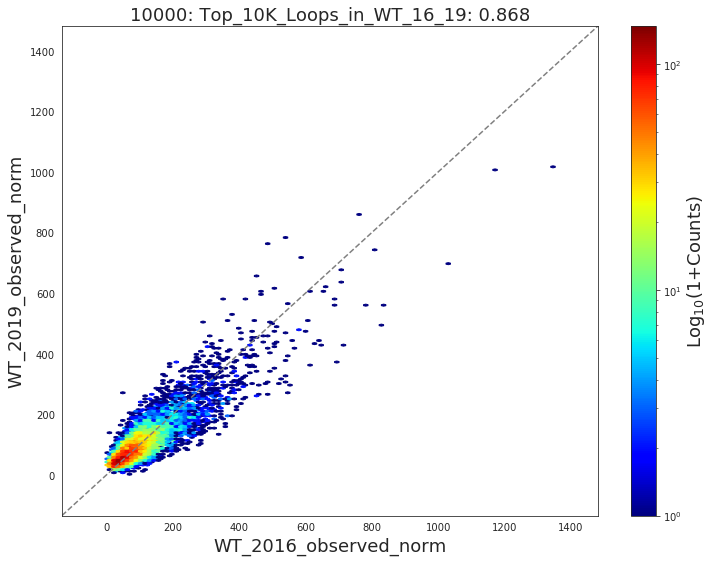

In [54]:
PATH_files = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/16_19/"
xx = glob.glob(PATH_files+'*.csv')
NAME=xx[0]
print (NAME[len(PATH_files):])
df_WT_16 = pd.read_csv(NAME,sep='\t', header=0).reset_index()

NAME=xx[1]
print (NAME[len(PATH_files):])
df_WT_19 = pd.read_csv(NAME,sep='\t', header=0).reset_index()


#df_WT_16 = df_WT_16[(df_WT_16['WT_observed'] > 1.0) & (df_WT_16['DKO_observed'] > 1.0)]
#df_DKO_16 = df_DKO_16[(df_DKO_16['WT_observed'] > 1.0) & (df_DKO_16['DKO_observed'] > 1.0)]
df_WT_16['WT_2016_observed_norm'] = df_WT_16.loc[:, ['WT_2016_observed']]/df_WT_16.loc[:, ['WT_2016_observed']].sum()*10**6
df_WT_19['WT_2019_observed_norm'] = df_WT_19.loc[:, ['WT_2019_observed']].astype(int)/df_WT_19.loc[:, ['WT_2019_observed']].sum()*10**6

df_WT_16_19 = df_WT_16[['index','WT_2016_observed_norm']].merge(df_WT_19[['index','WT_2019_observed_norm']], on='index').set_index('index')
# 
df_WT_16_19 = df_WT_16[['index','WT_2016_observed_norm']].merge(df_WT_19[['index','WT_2019_observed_norm']], on='index').set_index('index')



df_plot = df_WT_16_19
aa = hexbin_with_density(df_plot, '', 'Top_10K_Loops_in_WT_16_19: ' + str("{:.3f}".format(df_plot.corr().iloc[0,1])), 'log',0) #_scale=log$_2$(1+RPKM)

WT_CD8_2016.bedpeWT_2019_observed_2019.csv
DKO_2016.bedpeDKO_2019_observed_2019.csv


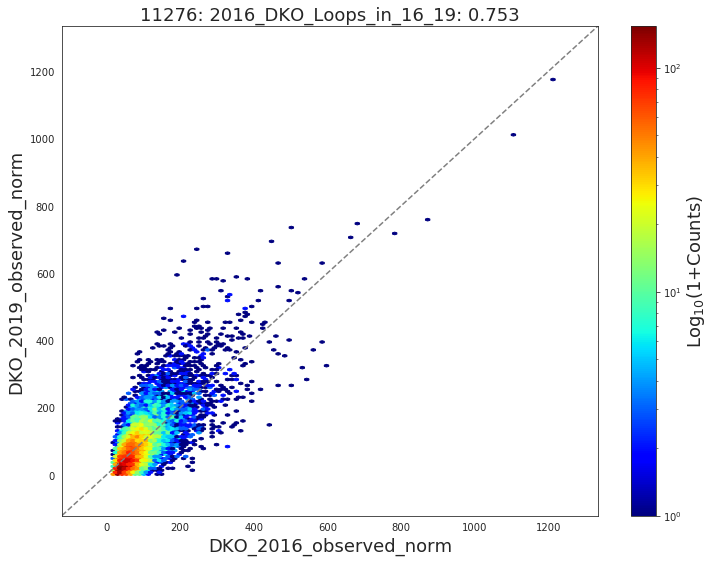

In [69]:
PATH_files = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/"
xx = glob.glob(PATH_files+'*.csv')
NAME=xx[0]
print (NAME[len(PATH_files):])
df_WT_16 = pd.read_csv(NAME,sep='\t', header=0)#.reset_index()

NAME=xx[1]
print (NAME[len(PATH_files):])
df_DKO_19 = pd.read_csv(NAME,sep='\t', header=0)#.reset_index()


#df_WT_16 = df_WT_16[(df_WT_16['WT_observed'] > 1.0) & (df_WT_16['DKO_observed'] > 1.0)]
#df_DKO_16 = df_DKO_16[(df_DKO_16['WT_observed'] > 1.0) & (df_DKO_16['DKO_observed'] > 1.0)]
df_WT_16['WT_2016_observed_norm'] = df_WT_16.loc[:, ['observed']]/df_WT_16.loc[:, ['observed']].sum()*10**6
df_WT_16['WT_2019_observed_norm'] = df_WT_16.loc[:, ['WT_2019_observed']].astype(int)/df_WT_16.loc[:, ['WT_2019_observed']].sum()*10**6

#df_WT_16_19 = df_WT_16[['index','WT_2016_observed_norm']].merge(df_WT_19[['index','WT_2019_observed_norm']], on='index').set_index('index')
# 
#df_WT_16_19 = df_WT_16[['index','WT_2016_observed_norm']].merge(df_WT_19[['index','WT_2019_observed_norm']], on='index').set_index('index')

df_DKO_19['DKO_2016_observed_norm'] = df_DKO_19.loc[:, ['observed']]/df_DKO_19.loc[:, ['observed']].sum()*10**6
df_DKO_19['DKO_2019_observed_norm'] = df_DKO_19.loc[:, ['DKO_2019_observed']].astype(int)/df_DKO_19.loc[:, ['DKO_2019_observed']].sum()*10**6


df_plot = (df_DKO_19.loc[:,['DKO_2016_observed_norm', 'DKO_2019_observed_norm']])
aa = hexbin_with_density(df_plot, '', '2016_DKO_Loops_in_16_19: ' + str("{:.3f}".format(df_plot.corr().iloc[0,1])), 'log',0) #_scale=log$_2$(1+RPKM)

In [123]:
### Fold Change
PATH_files = "/home/xli/Data/Haihui/CD8-HP/HiC_2019/Data/Naive_Merge_2016_1910/Juicebox_16_19/backup/res_10k/2016/"
xx = glob.glob(PATH_files+'*.txt')
NAME=xx[0]
print (NAME[len(PATH_files):])
df_WT_16 = pd.read_csv(NAME,sep='\t', header=0).reset_index()

NAME=xx[1]
print (NAME[len(PATH_files):])
df_DKO_16 = pd.read_csv(NAME,sep='\t', header=0).reset_index()

df_DKO_16['index'] = df_DKO_16['index']+len(df_WT_16.index)


df_16 = df_WT_16#.append(df_DKO_16)
#df_16= df_DKO_16


df_16['WT_2016_observed_norm'] = df_16.loc[:, ['WT_2016_observed']]/df_16.loc[:, ['WT_2016_observed']].sum()*10**6
df_16['WT_2019_observed_norm'] = df_16.loc[:, ['WT_2019_observed']]/df_16.loc[:, ['WT_2019_observed']].sum()*10**6
df_16['DKO_2016_observed_norm'] = df_16.loc[:, ['DKO_2016_observed']]/df_16.loc[:, ['DKO_2016_observed']].sum()*10**6
df_16['DKO_2019_observed_norm'] = df_16.loc[:, ['DKO_2019_observed']]/df_16.loc[:, ['DKO_2019_observed']].sum()*10**6


df_16['FC_2016'] = df_16['DKO_2016_observed_norm']/df_16['WT_2016_observed_norm']
df_16['FC_2019'] = df_16['DKO_2019_observed_norm']/df_16['WT_2019_observed_norm']

#df_WT_16['WT_2016_observed_norm'] = df_WT_16.loc[:, ['WT_CD8_2016_observed']]/df_WT_16.loc[:, ['WT_CD8_2016_observed']].sum()*10**6
#df_WT_16.iloc[:,[7,8,9,10]]

WT_CD8_2016_fc.txt
DKO_CD8_2016_fc.txt


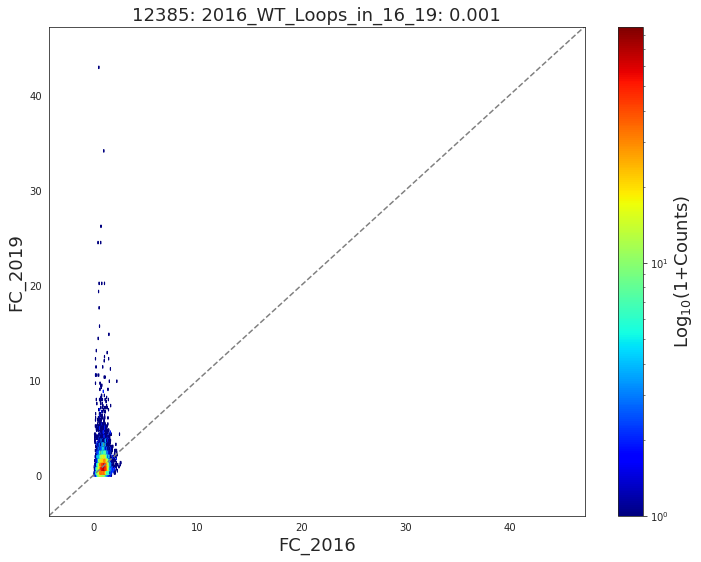

In [124]:
#df_WT_16.head()
df_plot = (df_16.loc[ :,['FC_2016', 'FC_2019']])
aa = hexbin_with_density(df_plot, '', '2016_WT_Loops_in_16_19: ' + str("{:.3f}".format(df_plot.corr().iloc[0,1])), 'log',0) #_scale=log$_2$(1+RPKM)

In [7]:
df_WT_19 = df_WT_16_WT.merge(df_WT_16_DKO).reset_index()
df_DKO_19 = df_DKO_16_WT.merge(df_DKO_16_DKO).reset_index()
df_DKO_19['index'] = df_DKO_19['index']+len(df_WT_19.index)

df_WT_19 = df_WT_19[(df_WT_19['WT_observed'] > 1.0) & (df_WT_19['DKO_observed'] > 1.0)]
df_DKO_19 = df_DKO_19[(df_DKO_19['WT_observed'] > 1.0) & (df_DKO_19['DKO_observed'] > 1.0)]
df_WT_16 = df_WT_16[(df_WT_16['WT_observed'] > 1.0) & (df_WT_16['DKO_observed'] > 1.0)]
df_DKO_16 = df_DKO_16[(df_DKO_16['WT_observed'] > 1.0) & (df_DKO_16['DKO_observed'] > 1.0)]

In [33]:
#df_16.head(1)
Norm_2016 = 5931177.0/6048211.0

df_WT_16['FC'] = df_WT_16['DKO_observed']/df_WT_16['WT_observed'] * Norm_2016
df_DKO_16['FC'] = df_DKO_16['DKO_observed']/df_DKO_16['WT_observed'] * Norm_2016

In [34]:
df_WT_Specific.head()

,#chr1,x1,x2,chr2,y1,y2,observed,fdrDonut,DKO_observed,WT_observed,FC
1,10,20940000.0,20950000.0,10,21010000.0,21020000.0,76.0,6.501183e-10,14,76.0,0.180646
19,10,19650000.0,19660000.0,10,19790000.0,19800000.0,59.0,2.870236e-14,15,59.0,0.249318
26,10,23890000.0,23900000.0,10,24010000.0,24020000.0,58.0,6.557553e-22,17,58.0,0.287432
27,10,19620000.0,19630000.0,10,19790000.0,19800000.0,58.0,3.803666e-10,17,58.0,0.287432
33,10,20870000.0,20880000.0,10,21050000.0,21060000.0,57.0,3.413990e-13,14,57.0,0.240861


In [62]:
###
FDR=10**(-5)
FC=2.0
df_WT_Specific = df_WT_16[(df_WT_16['FC']<1.0/FC)&(df_WT_16['fdrDonut']<FDR)]
df_DKO_Specific = df_DKO_16[(df_DKO_16['FC']>FC)&(df_DKO_16['fdrDonut']<FDR)]


df_diff_HiC = df_WT_Specific.append(df_DKO_Specific).set_index('index').loc[:,['#chr1','x1','x2','chr2','y1', 'y2','FC','fdrDonut','fdrDonut']]
df_diff_HiC = df_diff_HiC.iloc[:,[0,1,2,3,4,5,6]]
df_diff_HiC.shape

/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(4101, 7)

In [63]:
df_diff_HiC.shape

(4101, 7)

In [77]:
df_16 = df_WT_16.append(df_DKO_16)
#df_19 = df_WT_19.append(df_DKO_19)
#df_plot = df_DKO_16_Diff[['FC','index']].merge(df_DKO_19[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))#.drop(columns='index')
#df_plot = #
df_all = df_19[['index', 'WT_observed', 'DKO_observed']].merge(df_16[['index', 'WT_observed', 'DKO_observed']], on='index', how='inner', suffixes=('_19','_16')).set_index('index')#.to_csv('HiC_Replicates.csv', sep="\t", index=None)

df_all = df_19[['index', '#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2']].merge(df_16[['index', '#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2']], on=['index', '#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2'], how='inner', suffixes=('_19','_16'))#.set_index('index')

df_EdgeR = pd.read_csv("edgeR_Results_DKO-WT.txt", sep="\t")
df_all = df_all.merge(df_EdgeR, left_on='index', right_on='GeneID', how='inner').set_index('index')
df_all.head(1)

,#chr1,x1,x2,chr2,y1,y2,GeneID,logFC,logCPM,F,PValue,FDR
index,,,,,,,,,,,,
1,10,12500000.0,12600000.0,10,21500000.0,21600000.0,1,-0.442096,2.935492,0.356066,0.579573,0.991908


In [87]:
FC=2.0
FDR=0.05
df_DKO_Specific = df_all[ (df_all['logFC']>np.log2(FC)) & (df_all['PValue']<FDR)]
df_DKO_Specific.to_csv('1853_DKO_specific_Loops.txt', index=None, sep="\t")


df_WT_Specific = df_all[ (df_all['logFC']<np.log2(1/FC)) & (df_all['PValue']<FDR)]
df_WT_Specific.to_csv('1205_WT_specific_Loops.txt', index=None, sep="\t")


In [141]:
df_diff_HiC = df_WT_Specific.loc[:,['#chr1','x1','x2','chr2','y1', 'y2','logFC','PValue','FDR']].append(df_DKO_Specific.loc[:,['#chr1','x1','x2','chr2','y1', 'y2','logFC','PValue','FDR']])
df_diff_HiC = df_diff_HiC.iloc[:,[0,1,2,3,4,5,6]]



/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [154]:
def generate_genes_FPKM_df(Input_Path):
    df = pd.read_csv(Input_Path+'/genes.read_group_tracking', sep='\t', header=0)
    FPKM_df = None
    for cond in df['condition'].unique():
        for replica in df[df['condition'] == cond]['replicate'].unique():
            #print (cond, replica)
            temp_df = (df[ (df['condition'] == cond) & (df['replicate'] == replica)].loc[:,['tracking_id', 'FPKM']])
            cond_name= cond+'_'+str(replica)
            temp_df.rename(columns={'tracking_id': 'gene_id', 'FPKM': cond_name }, inplace=True)
            if FPKM_df is None:
                FPKM_df
                FPKM_df = temp_df  
            else:
                FPKM_df = FPKM_df.merge(temp_df, on='gene_id', how='outer', suffixes=('','_'))
    return FPKM_df

In [169]:
### customized method  HiC associated with Promoter

#df_diff_HiC = df_hic_DKO
#df_diff_HiC = df_hic

#df_diff_HiC = df_WT_specific.append(df_DKO_specific)

df_diff_HiC = df_diff_HiC.iloc[:,[0,1,2,3,4,5,6]]#.reset_index()


## Associated by promoter

## Make pairs double due two two bins.
df_diff_HiC=df_diff_HiC.append(pd.DataFrame(df_diff_HiC.iloc[:,[3,4,5,0,1,2,6]].values, columns=df_diff_HiC.columns),sort=False).sort_index()

Path_Promoter='/home/xli/cloud_research/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Annotation/gene_promoter_1k_iv_unique.bed'
Path_DEGs_Promoter="/home/xli/cloud_research/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Annotation/313_259_DEGs_Promoter_Regions_ext_1kb.bed"
Tcf1_path='/home/xli/cloud_research/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/transcription_factor_Tcf1/WT_CD8_TCF1_peaks_19042.bed'


def feature_associated_genes(gene_annotation_path, feature_path):
    gene_annotation_Bed=BedTool(gene_annotation_path).sort()
    features_Bed=BedTool(feature_path).sort()
    
    #########################################################################################
    ## pre step remove the one overlap with DEGs promoter
    #feature_DEGs_Promoter=BedTool('313_259_DEGs_Promoter_Regions_ext_1kb.bed')
    #features_Bed = features_Bed.intersect(feature_DEGs_Promoter, u=True)
    #########################################################################################
    df_all_group = pd.DataFrame()
    ### first association by overlap
    features_associated_genes = features_Bed.intersect(gene_annotation_Bed, wa=True, wb=True)
    if (features_associated_genes.count()!=0):
        print ("Found overlap, then by nearest.")
        df_all_group = pd.read_table(features_associated_genes.fn, header=None)
    ### Second associate rest features by cloest
    '''
    features_no_overlap = features_Bed.intersect(gene_annotation_Bed,v=True)
    if (features_no_overlap.count()!=0):
        print "Nearest"
        features_closest_associated=features_no_overlap.closest(gene_annotation_Bed, t='all')
        df_features_closest_associated=pd.read_table(features_closest_associated.fn, header=None)
        df_all_group = df_all_group.append(df_features_closest_associated)
    '''
    return df_all_group

df_diff_HiC.iloc[:,[0]]  = 'chr'+df_diff_HiC.iloc[:,[0]] 
df_diff_HiC.iloc[:,[1,2]] = df_diff_HiC.iloc[:,[1,2]].astype(int)

Feature_Diff_HiC=BedTool.from_dataframe(df_diff_HiC.iloc[:,[0,1,2,6]]).sort()

df_feature_associated_diff_HiC = feature_associated_genes(Path_Promoter, Feature_Diff_HiC.fn)

print (len(df_feature_associated_diff_HiC[6].unique()))

RAW_PATH='/home/xli/cloud_research/XLi/Data/Haihui/CD8-HP/RNA_seq/CuffDiff_Jun2018/Cuffdiff_Results/DKO_0h_vs_WT_0h'
df_FPKM=generate_genes_FPKM_df(RAW_PATH)
df_FPKM = df_FPKM.loc[((df_FPKM.iloc[:,1:7]!=0).any(axis=1))]

df_FPKM_plot = df_FPKM.merge(df_feature_associated_diff_HiC[[3, 7]].drop_duplicates(), left_on='gene_id',right_on=7, how='inner')
#df_FPKM_plot = df_FPKM_plot[df_FPKM_plot.iloc[:,1:7].sum(axis=1)>6.0]
#print len(df_FPKM_plot)

#print len(df_feature_associated_diff_HiC[df_feature_associated_diff_HiC[8]=='Up'][7].unique())
#print len(df_feature_associated_diff_HiC[df_feature_associated_diff_HiC[8]=='Down'][7].unique())
#df_feature_associated_diff_HiC[df_feature_associated_diff_HiC[8]=='Down'][7].unique()

Found overlap, then by nearest.
302


In [163]:
df_DEG = pd.read_csv(Path_DEGs_Promoter, sep="\t")

df_FPKM_plot.head(1)

df_DEG.head(1)

,#chr,start,end,id,expression,Tcf1_Binding
0,chr9,94437499,94439500,1190002N15Rik,Up,Yes


In [171]:
df_DEGs_With_Loops = df_FPKM_plot.merge(df_DEG, left_on='gene_id', right_on='id')
df_DEGs_With_Loops
#df_DEGs_with_DKO_specific = df_DEGs_With_Loops[df_DEGs_With_Loops[3]>(FC)]
#df_DEGs_with_WT_specific = df_DEGs_With_Loops[df_DEGs_With_Loops[3]<(1/FC)]


df_DEGs_With_Loops[df_DEGs_With_Loops['expression']=='Up']['gene_id'].unique()

array(['Kctd11', 'Ldlr', 'March3', 'Pcyt1a', 'Slfn5', 'Zfp629'],
      dtype=object)

In [165]:
df_DEGs_with_WT_specific[df_DEGs_with_WT_specific['expression']=='Up']['gene_id'].unique().shape

NameError: name 'df_DEGs_with_WT_specific' is not defined

In [70]:
df_DEGs_with_DKO_specific[df_DEGs_with_DKO_specific['expression']=='Down']['gene_id'].unique().shape

(30,)

In [48]:
def hexbin_with_density(df, highlight_name, title_name, density_scale, drop_top_outlier):
    ### drop outlier
    df = df.drop(df.iloc[:,0].nlargest(n=drop_top_outlier,keep='first').index)
    
    
    range_limit=df.max().max()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9), sharex=False, sharey=False)
    
    if density_scale == 'log':
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   bins='log',mincnt=1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Log$_{10}$(1+Counts)', fontsize=18)
    else:
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   mincnt=1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Counts', fontsize=18)

    ###  highlight a point
    if len(highlight_name) >= 1:
        for highlight_index in highlight_name[:]:
            ax.scatter(df[df.index == highlight_index].iloc[:,[0]],
                        df[df.index == highlight_index].iloc[:,[1]],
                        alpha=1.0,s=50,color='red', label=highlight_index,edgecolor='red')
            ax.text(df[df.index == highlight_index].iloc[:,0]-range_limit/20.0,
                      df[df.index == highlight_index].iloc[:,1]+range_limit/25.0, highlight_index, fontsize=16, color='r')


    ax.yaxis.grid(False)
    ax.set_ylim(-0.1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlim(-0.1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlabel(str(df.columns[0]), fontsize=18)
    ax.set_ylabel(str(df.columns[1]), fontsize=18)
    ax.plot([-0.1*range_limit,range_limit+0.1*range_limit], [-0.1*range_limit, range_limit+0.1*range_limit], ls="--", c="gray")
    ax.set_title(str(len(df))+ ': '+ title_name , fontsize=18)
    return 0

In [7]:
import numpy as np
import pandas as pd
import os

def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

# Plot Package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline
#from pybedtools import BedTool

In [56]:
print (df_WT_19['WT_observed'].sum()+df_DKO_19['WT_observed'].sum())#.head()
print (df_WT_19['DKO_observed'].sum()+df_DKO_19['DKO_observed'].sum())
print (df_WT_16['WT_observed'].sum() + df_DKO_16['WT_observed'].sum())#.head()
print (df_WT_16['DKO_observed'].sum() + df_DKO_16['DKO_observed'].sum())#.head()


3534538.0
4595465.0
5931177.0
6048211.0


0.980649815292489

In [83]:
#Norm_2019 = 395569590.0/242913502.0
#Norm_2016 = 363178026.0/354136239.0
Norm_2019 = 3534538.0/4595465.0
Norm_2016 = 5931177.0/6048211.0

df_WT_16['FC'] = df_WT_16['DKO_observed']/df_WT_16['WT_observed'] * Norm_2016
df_DKO_16['FC'] = df_DKO_16['DKO_observed']/df_DKO_16['WT_observed'] * Norm_2016
df_WT_19['FC'] = df_WT_19['DKO_observed']/df_WT_19['WT_observed'] * Norm_2019
df_DKO_19['FC'] = df_DKO_19['DKO_observed']/df_DKO_19['WT_observed'] * Norm_2019

In [84]:
FDR_value= 0.00001
FC = 2.0
df_WT_16_Diff = df_WT_16[(df_WT_16['fdrDonut']<FDR_value)&(df_WT_16['FC']<1.0/FC)]
df_DKO_16_Diff = df_DKO_16[(df_DKO_16['fdrDonut']<FDR_value)&(df_DKO_16['FC']>FC)]
df_WT_19_Diff = df_WT_19[(df_WT_19['fdrDonut']<FDR_value)&(df_WT_19['FC']<1.0/FC)]
df_DKO_19_Diff = df_DKO_19[(df_DKO_19['fdrDonut']<FDR_value)&(df_DKO_19['FC']>FC)]

In [104]:
df_plot = df_DKO_16_Diff[['FC','index']].merge(df_DKO_19[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))#.drop(columns='index')

df_plot = df_WT_16_Diff[['FC','index']].merge(df_WT_19[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))#.drop(columns='index')

FC_fc = 10.0

print (df_plot[df_plot['FC_19']< 1.0/FC_fc].shape)

print (df_plot[df_plot['FC_19']> FC_fc].shape)
#aa = hexbin_with_density(np.log2(1+1/df_plot),'', 'On_WT_Specific_Loops_Pearson_Corr_Log2(1+1/FC):' + str("{:.3f}".format(np.log2(1+1/df_plot).corr().iloc[0,1])), 'log',0)

(175, 3)
(73, 3)


In [106]:
df_WT_16_Diff[df_WT_16_Diff['index'] ==1958]


,index,#chr1,x1,x2,chr2,y1,y2,observed,fdrDonut,DKO_observed,WT_observed,FC
1958,1958,10,18000000.0,18250000.0,10,38500000.0,38750000.0,116.0,5.263765e-08,9.0,116.0,0.076085


In [105]:
df_plot[df_plot['FC_19']> FC_fc].head(1)
#

,FC_16,index,FC_19
589,0.076085,1958,10.767905


In [107]:
df_WT_19[df_WT_19['index']==1958]

,index,#chr1,x1,x2,chr2,y1,y2,observed,fdrDonut,WT_observed,DKO_observed,FC
1958,1958,10,18000000.0,18250000.0,10,38500000.0,38750000.0,116.0,5.263765e-08,2.0,28.0,10.767905


In [108]:
df_WT_16[df_WT_16['index']==1958]

,index,#chr1,x1,x2,chr2,y1,y2,observed,fdrDonut,DKO_observed,WT_observed,FC
1958,1958,10,18000000.0,18250000.0,10,38500000.0,38750000.0,116.0,5.263765e-08,9.0,116.0,0.076085


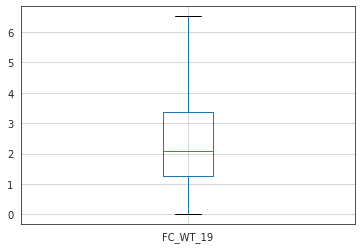

In [270]:
df_WT_16_Diff.describe()
#df_WT_19.loc[df_WT_16_Diff.index, ['FC']].boxplot(showfliers=False)
df_WT_19[['FC']].rename(columns={'FC':'FC_WT_19'}).boxplot(showfliers=False)
#df_WT_19.loc[df_WT_16.index, ['FC']].rename(columns={'FC':'FC_WT_19'}).boxplot(showfliers=False)#, by=['X', 'Y'])



In [199]:
df_19_Diff = df_WT_19_Diff.append(df_DKO_19_Diff).drop(columns='observed')
df_16_Diff = df_WT_16_Diff.append(df_DKO_16_Diff).drop(columns='observed')


In [217]:
df_plot = df_16_Diff[['FC','index']].merge(df_19_Diff[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))

#df_plot = df_WT_16_Diff[['FC','index']].merge(df_WT_19_Diff[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))


#df_plot = df_DKO_16_Diff[['FC','index']].merge(df_DKO_19_Diff[['FC','index']], on='index', how='inner', suffixes=('_16','_19'))


df_plot = df_plot.drop(columns='index')

In [49]:
df_WT_16_19

,WT_2016_observed_norm,WT_2019_observed_norm
index,,
0,277.752741,324.201653
1,301.665229,302.019435
2,364.205581,192.814668
3,259.358520,252.536025
4,285.110430,204.758939
...,...,...
9995,36.788443,34.126490
9996,57.022086,46.070761
9997,47.824975,54.602384


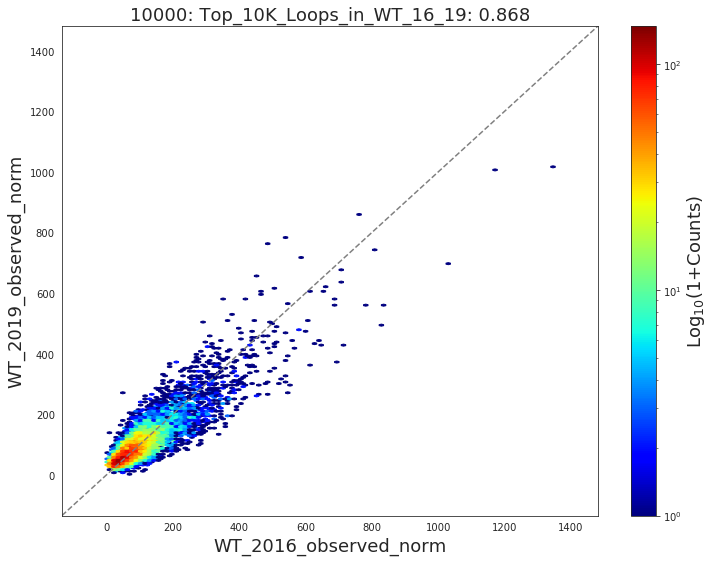

In [53]:
#df.loc[:,['FC','FC_1910']].head(1)
#df_plot = [df_WT_16['FC'], df_DKO_16['FC']]#df[['FC','FC_1910']].replace([np.inf, -np.inf], np.nan).dropna()
df_plot = df_WT_16_19
aa = hexbin_with_density(df_plot, '', 'Top_10K_Loops_in_WT_16_19: ' + str("{:.3f}".format(df_plot.corr().iloc[0,1])), 'log',0) #_scale=log$_2$(1+RPKM)